This project will try to investigate any coreeelations betrween time in education, including gender based differences, and level of development of countries and regions. I believe there should be clear correlation between these two factors with the most developed countries having the longest period in education and the smallest gender based difference. This still leaves the question about quality of education and causation of this.

It would be intersting to see the percentage of life spent in education by region and level of development, which would require comparison with life expectancy for each of them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/mara-ber/programing_for_data/main/data%20sets/Expected%20years%20of%20schooling%20(years).csv"
years_of_schooling = pd.read_csv(url)
years_of_schooling.info()
#display(years_of_schooling)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      210 non-null    object
 1   1990         208 non-null    object
 2   1991         210 non-null    object
 3   1992         210 non-null    object
 4   1993         210 non-null    object
 5   1994         210 non-null    object
 6   1995         210 non-null    object
 7   1996         210 non-null    object
 8   1997         210 non-null    object
 9   1998         210 non-null    object
 10  1999         210 non-null    object
 11  2000         210 non-null    object
 12  2001         210 non-null    object
 13  2002         210 non-null    object
 14  2003         210 non-null    object
 15  2004         210 non-null    object
 16  2005         210 non-null    object
 17  2006         210 non-null    object
 18  2007         210 non-null    object
 19  2008         210 non-null    

clean the data frame

In [2]:
years_of_schooling.drop(years_of_schooling.columns[31], axis = 1, inplace = True)
years_of_schooling.info()
display(years_of_schooling)
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  210 non-null    object
 1   1990     208 non-null    object
 2   1991     210 non-null    object
 3   1992     210 non-null    object
 4   1993     210 non-null    object
 5   1994     210 non-null    object
 6   1995     210 non-null    object
 7   1996     210 non-null    object
 8   1997     210 non-null    object
 9   1998     210 non-null    object
 10  1999     210 non-null    object
 11  2000     210 non-null    object
 12  2001     210 non-null    object
 13  2002     210 non-null    object
 14  2003     210 non-null    object
 15  2004     210 non-null    object
 16  2005     210 non-null    object
 17  2006     210 non-null    object
 18  2007     210 non-null    object
 19  2008     210 non-null    object
 20  2009     210 non-null    object
 21  2010     210 non-null    object
 22  20

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,5.2,...,9.5,9.5,10,10.2,10.3,10.2,10.3,10.1,10.1,10.2
1,Albania,11.6,11.8,10.7,10.1,10.1,10.2,10.2,10.5,10.7,...,13,13.7,14.6,14.9,15.3,15.1,14.8,14.8,14.7,14.7
2,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10,10.3,10.5,...,14,14.3,13.9,13.6,14,14.2,14.2,14.4,14.5,14.6
3,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,...,11.7,11.7,13.5,13.1,13.5,13.1,13.3,13,13.3,13.3
4,Angola,3.4,3.3,3.2,3.7,3.8,3.9,4,4.1,4.2,...,8.6,9.5,9.9,10.3,10.7,11,11.4,11.8,11.8,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Sub-Saharan Africa,6.3,6.3,6.3,6.4,6.4,6.6,6.7,6.8,7,...,9.1,9.4,9.5,9.8,9.8,9.9,9.9,10,10,10.1
206,Least Developed Countries,5.2,5.3,5.4,5.5,5.6,5.7,5.9,6.1,6.3,...,9,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.8,9.9
207,Small Island Developing States,9.7,9.7,9.7,9.8,9.7,9.7,9.9,9.9,10,...,12.1,12.2,11.9,11.9,12,12.2,12.1,12.2,12.2,12.3
208,Organization for Economic Co-operation and Dev...,13.3,13.5,13,13.8,14,14.2,14.3,13.9,14.5,...,15.5,15.6,15.7,16,16,16.1,16.3,16.3,16.3,16.3


to see data by regions andothers categories

In [3]:
years_of_schooling.tail(20)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
190,Yemen,7.5,7.5,7.6,7.6,7.6,7.6,7.6,7.6,7.6,...,8.6,9,8.5,8.8,8.7,8.7,8.7,8.7,8.7,8.8
191,Zambia,7.5,7.7,8,8.2,8.4,8.7,8.9,9.1,9.3,...,11,10.9,10.9,11,11,11.1,11.2,11.3,11.4,11.5
192,Zimbabwe,9.8,10.2,9.8,9.8,9.8,9.8,9.8,9.8,9.8,...,10.1,10.2,10.3,10.2,10.3,10.3,10.4,10.5,10.5,11
193,Human Development,NaN,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
194,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3
195,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,12.9,13.1,13.3,13.5,13.6,13.7,13.8,13.8,13.8,14
196,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,10.3,10.7,10.9,11,11.2,11.3,11.6,11.7,11.7,11.5
197,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,8.7,8.9,9,9.2,9.2,9.3,9.2,9.3,9.3,9.4
198,Developing Countries,8.4,8.5,8.5,8.6,8.6,8.8,8.9,9,9.1,...,11.3,11.5,11.7,11.8,12,12,12.2,12.2,12.2,12.2
199,Regions,NaN,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [10]:
schooling_development = years_of_schooling[194:198]
schooling_development.reset_index(drop=True, inplace=True)
display(schooling_development)


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3
1,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,12.9,13.1,13.3,13.5,13.6,13.7,13.8,13.8,13.8,14
2,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,10.3,10.7,10.9,11,11.2,11.3,11.6,11.7,11.7,11.5
3,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,8.7,8.9,9,9.2,9.2,9.3,9.2,9.3,9.3,9.4


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3


['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    1 non-null      float64
 1   1991    1 non-null      float64
 2   1992    1 non-null      int64  
 3   1993    1 non-null      float64
 4   1994    1 non-null      float64
 5   1995    1 non-null      float64
 6   1996    1 non-null      int64  
 7   1997    1 non-null      float64
 8   1998    1 non-null      float64
 9   1999    1 non-null      float64
 10  2000    1 non-null      float64
 11  2001    1 non-null      float64
 12  2002    1 non-null      float64
 13  2003    1 non-null      float64
 14  2004    1 non-null      int64  
 15  2005    1 non-null      float64
 16  2006    1 non-

In [12]:
schooling_1 = vhigh_dev.drop(['Country'], axis=1)
schooling_1 = schooling_1.apply(pd.to_numeric, errors = 'coerce')
schooling_1.info()
display(schooling_1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    1 non-null      float64
 1   1991    1 non-null      float64
 2   1992    1 non-null      int64  
 3   1993    1 non-null      float64
 4   1994    1 non-null      float64
 5   1995    1 non-null      float64
 6   1996    1 non-null      int64  
 7   1997    1 non-null      float64
 8   1998    1 non-null      float64
 9   1999    1 non-null      float64
 10  2000    1 non-null      float64
 11  2001    1 non-null      float64
 12  2002    1 non-null      float64
 13  2003    1 non-null      float64
 14  2004    1 non-null      int64  
 15  2005    1 non-null      float64
 16  2006    1 non-null      float64
 17  2007    1 non-null      float64
 18  2008    1 non-null      float64
 19  2009    1 non-null      float64
 20  2010    1 non-null      float64
 21  2011    1 non-null      float64
 22  2012  

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,14.4,...,15.6,15.7,15.8,16.1,16.2,16.3,16.4,16.4,16.4,16.3


['5.4' '7.3' '9.7' '13.3']
['Low human development', 'Medium human development', 'High human development', 'Very high human development']


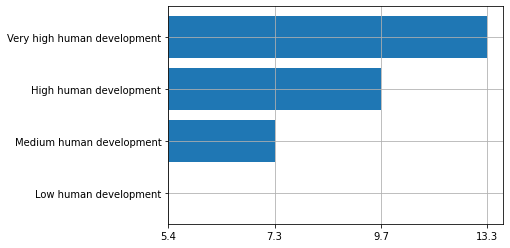

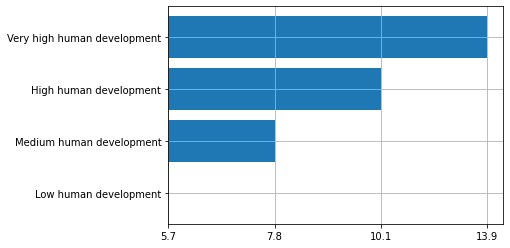

In [13]:
y_1990 = schooling_development['1990'].values[::-1]
print(y_1990)
labels = ['Low human development', 'Medium human development', 'High human development', 'Very high human development']
print(labels)
y_1995 = schooling_development['1995'].values[::-1]

plt.barh(labels, y_1990)
plt.grid()
plt.show()
plt.barh(labels, y_1995)
#plt.xlim(0, 3)
plt.grid()
plt.show()

In [14]:
def change(df, x, y, name):
    n = df[y].apply(pd.to_numeric, errors='coerce') - df[x].apply(pd.to_numeric, errors='coerce')
    df[name] = n

change(schooling_development, '1990', '2000', 'change 1990-2000')
change(schooling_development, '2000', '2010', 'change 2000-2010')
change(schooling_development, '2010', '2019', 'change 2010-2019')

def total(df, x, y, z):
    s = x + y + z
    df['total'] = s

total(schooling_development, schooling_development['change 1990-2000'], schooling_development['change 2000-2010'], schooling_development['change 2010-2019'])
display(schooling_development)
    

<ipython-input-14-e96a30c6ffc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = n
<ipython-input-14-e96a30c6ffc9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = s


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,change 1990-2000,change 2000-2010,change 2010-2019,total
0,Very high human development,13.3,13.4,13,13.7,13.8,13.9,14,13.7,14.2,...,16.2,16.3,16.4,16.4,16.4,16.3,1.1,1.2,0.7,3.0
1,High human development,9.7,9.7,9.8,9.9,9.9,10.1,10.3,10.4,10.5,...,13.6,13.7,13.8,13.8,13.8,14,1.1,2.1,1.1,4.3
2,Medium human development,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8,...,11.2,11.3,11.6,11.7,11.7,11.5,0.8,2.2,1.2,4.2
3,Low human development,5.4,5.4,5.4,5.5,5.5,5.7,5.9,6.1,6.3,...,9.2,9.3,9.2,9.3,9.3,9.4,1.4,1.9,0.7,4.0


This shows that the most rapid increace in number of years in education was diring 2000-2010, after this period this process slowed down for all levels of development. It would be intersting to compare it with changes by regions and by gender of students. 
Overall, the goup of countries with very high human development demonstrated the lowest increase in number of years in education during the period from 1990 to 2019. Other groups showed quite similar results in total change, from 4 to 4.3 years of increase. However, comparison of actuall numbers for 2019 shows that in these countries a person in average spend 5.9 years more in education than in countries with low level of human development (16.3 and 9.4).

Graphs for each level of development to see how the changes have been happenning

,0,1,2,3
Country,Very high human development,High human development,Medium human development,Low human development
1990,13.3,9.7,7.3,5.4
1991,13.4,9.7,7.4,5.4
1992,13,9.8,7.5,5.4
1993,13.7,9.9,7.6,5.5
1994,13.8,9.9,7.7,5.5
1995,13.9,10.1,7.8,5.7
1996,14,10.3,7.9,5.9
1997,13.7,10.4,7.9,6.1
1998,14.2,10.5,8,6.3


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Country to total
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
 1   1       35 non-null     object
 2   2       35 non-null     object
 3   3       35 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


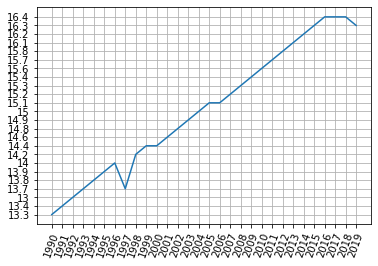

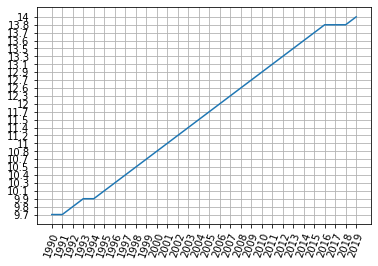

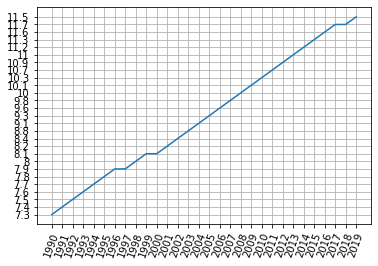

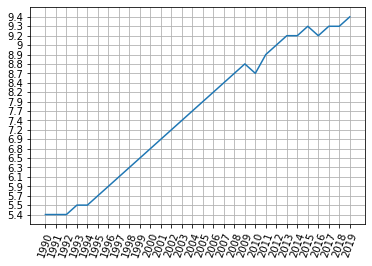

In [30]:
schooling_development_t = schooling_development.T
display(schooling_development_t)
schooling_development_t.info()
VH_dev = schooling_development.iloc[0, 1:31]
H_dev = schooling_development.iloc[1, 1:31]
M_dev = schooling_development.iloc[2, 1:31]
L_dev = schooling_development.iloc[3, 1:31]
#display(VH_dev)
labels = VH_dev.keys()
plt.plot(labels, VH_dev)
plt.xticks(rotation=70)
plt.grid()
plt.show()

plt.plot(labels, H_dev)
plt.xticks(rotation=70)
plt.grid()
plt.show()

plt.plot(labels, M_dev)
plt.xticks(rotation=70)
plt.grid()
plt.show()

plt.plot(labels, L_dev)
plt.xticks(rotation=70)
plt.grid()

plt.show()
#data_1 = data.max()
#data_1